In [ ]:
import tweepy

import pandas as pd



api_key = ''
api_key_secret = ''

access_token = ''

access_token_secret = ''

# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

# search tweets
keywords = 'online class'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)




#tweets =  api.search_full_archive(label='FullArchive', query=keywords, fromDate="2020-01-01",toDate="2020-12-31")
# tweets = api.user_timeline(screen_name=user, count=limit, tweet_mode='extended')
#tweets=tweepy.Cursor(api.search_full_archive, label='FullArchive', query=keywords, fromDate="2020-01-01",toDate="2020-12-31",count=300, 
                     #tweet_mode='extended').pages(100)
# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

print(df)

                User                                              Tweet
0    paperswritingpr  @lexii199c Get online class homework, assignme...
1    Prowrit72896426  RT @Prowrit72896426: Your academic bestie is h...
2     deshsndinshfn1  statistics...\nHomework\nPhysics\nMaths\nOnlin...
3    magical_tracker  RT @be_a_goldfish: @oldladynewRN Wait, they ma...
4    Prowrit72896426  RT @Prowrit72896426: Your academic bestie is h...
..               ...                                                ...
295      quality_647  Need help? Don't fear reaching out ?\nAnyone g...
296   ForMyPalit_702  RT @peckpalit: ทีมออนไลน์พร้อมมั้ยครับ? 𝙨𝙝𝙪 𝙨𝙩...
297      quality_647  Need help? Don't fear reaching out ?\nAnyone g...
298   prodigies_hub1  We offer Online class homework, assignment and...
299   prodigies_hub1  Get your online Accounting class done for you!...

[300 rows x 2 columns]


In [ ]:
df[['Tweet','Category']].head()

,Tweet,Category
0,RT @netlearning20: 💡 Gestiona la evaluación de...,online
1,✅ Green board - Correct the mistake \n\n🌟 Lear...,online
2,"New beta Feature untuk pengguna Google sheet, ...",online
3,RT @netlearning20: Las 10 mejores #herramienta...,online
4,✅ Quiz in Arabic - Choose the correct answer\n...,online


In [ ]:
from wordcloud import WordCloud
from collections import Counter
import csv
from matplotlib import rcParams
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.util import ngrams
import re
import matplotlib.pyplot as plt

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


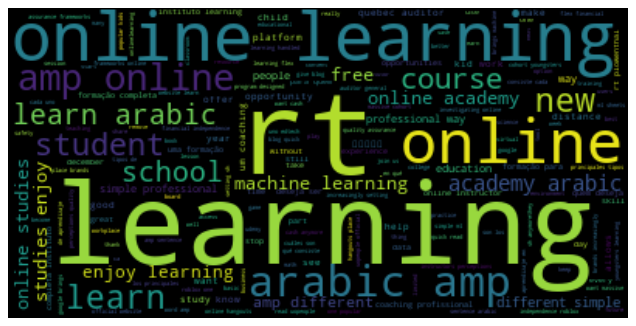

In [ ]:
# join the list and lowercase all the words
text = ' '.join(clean).lower()

#create the wordcloud object
wordcloud = WordCloud(
                      collocations=True).generate(text)

#plot the wordcloud object
plt.figure(figsize=(10, 6), dpi=80)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [ ]:
df1 = pd.DataFrame(clean, columns = ['tweet'])

In [ ]:
df1 = df1.assign(category="online")

In [ ]:
df1.shape

(300, 2)

In [ ]:
df1.head()

,tweet,category
0,RT Gestiona la evaluación de modo creativo Apl...,online
1,Green board Correct mistake Learn Arabic amp o...,online
2,New beta Feature untuk pengguna Google sheet b...,online
3,RT Las mejores herramientas de gestión de proy...,online
4,Quiz Arabic Choose correct answer Learn Arabic...,online


In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
df1.to_csv('/drive/Shared drives/Data Visualization -230/tweetdata.csv', mode='w', index=False, header=True)

In [ ]:
# search tweets
keywords = 'online learning'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(category="online")
df1.to_csv('/drive/Shared drives/Data Visualization -230/tweetdata.csv', mode='a', index=False)

NameError: ignored

In [ ]:
# search tweets
keywords = 'remote learning'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(category="online")
df1.to_csv('/drive/Shared drives/Data Visualization -230/tweetdata.csv', mode='a', index=False)

In [ ]:
# search tweets
keywords = 'covid learning'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(category="online")
df1.to_csv('/drive/Shared drives/Data Visualization -230/tweetdata.csv', mode='a', index=False)

In [ ]:
# search tweets
keywords = 'online education'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(category="online")
df1.to_csv('/drive/Shared drives/Data Visualization -230/tweetdata.csv', mode='a', index=False)

In [ ]:
# search tweets
keywords = 'offline education'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(category="offline")
df1.to_csv('/drive/Shared drives/Data Visualization -230/tweetdata.csv', mode='a', index=False)

In [ ]:
# search tweets
keywords = 'inperson learning'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(category="offline")
df1.to_csv('/drive/Shared drives/Data Visualization -230/tweetdata.csv', mode='a', index=False)

In [ ]:
# search tweets
keywords = 'inperson education'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(category="offline")
df1.to_csv('/drive/Shared drives/Data Visualization -230/tweetdata.csv', mode='a', index=False)

In [ ]:
# search tweets
keywords = 'return to school'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(category="offline")
df1.to_csv('/drive/Shared drives/Data Visualization -230/tweetdata.csv', mode='a', index=False)

In [ ]:
# search tweets
keywords = '#offlineclass'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(category="offline")
df1.to_csv('/drive/Shared drives/Data Visualization -230/tweetdata.csv', mode='a', index=False)

In [ ]:
# search tweets
keywords = 'offline class'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(category="offline")
df1.to_csv('/drive/Shared drives/Data Visualization -230/tweetdata.csv', mode='a', index=False)

In [ ]:
# search tweets
keywords = '#hybridclass'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(category="hybrid")
df1.to_csv('/drive/Shared drives/Data Visualization -230/tweetdata.csv', mode='a', index=False)

In [ ]:
# search tweets
keywords = 'hybrid class'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(category="hybrid")
df1.to_csv('/drive/Shared drives/Data Visualization -230/tweetdata.csv', mode='a', index=False)

In [ ]:
# search tweets
keywords = 'hybrid learning'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(category="hybrid")
df1.to_csv('/drive/Shared drives/Data Visualization -230/tweetdata.csv', mode='a', index=False)

In [ ]:
df = pd.read_csv('/drive/Shared drives/Data Visualization -230/tweetdata.csv')

In [ ]:
df.head()

NameError: ignored

In [ ]:
df1=df.dropna(subset=['tweet']).reset_index(drop=True)

In [ ]:
df1.head

<bound method NDFrame.head of                                                   tweet category
0     Get online class homework assignment exam expe...   online
1     Get online class homework assignment exam expe...   online
2     Get online exam help Math Thesis Research pape...   online
3     Get online class homework assignment exam expe...   online
4     What happens try put Big Power Hungry Gauss Ca...   online
...                                                 ...      ...
2901  RT rapplerdotcom BREAKING The Commission Highe...   hybrid
2902  RT pupcocdakom 𝗝𝗨𝗦𝗧 𝗜𝗡 Commission Higher Educa...   hybrid
2903  RT csjthinktank ChildrensComm Reasonable adjus...   hybrid
2904  RT assortedge BREAKING No full online classes ...   hybrid
2905  RT csjthinktank ChildrensComm Reasonable adjus...   hybrid

[2906 rows x 2 columns]>

In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob

In [ ]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

df1['sentiment'] = df1['tweet'].apply(sentiment_calc)

In [ ]:
df1.head

<bound method NDFrame.head of                                                   tweet category  \
0     Get online class homework assignment exam expe...   online   
1     Get online class homework assignment exam expe...   online   
2     Get online exam help Math Thesis Research pape...   online   
3     Get online class homework assignment exam expe...   online   
4     What happens try put Big Power Hungry Gauss Ca...   online   
...                                                 ...      ...   
2901  RT rapplerdotcom BREAKING The Commission Highe...   hybrid   
2902  RT pupcocdakom 𝗝𝗨𝗦𝗧 𝗜𝗡 Commission Higher Educa...   hybrid   
2903  RT csjthinktank ChildrensComm Reasonable adjus...   hybrid   
2904  RT assortedge BREAKING No full online classes ...   hybrid   
2905  RT csjthinktank ChildrensComm Reasonable adjus...   hybrid   

                                        sentiment  
0                                      (0.0, 0.0)  
1                                      (0.0, 0.0)

In [ ]:
df1.sentiment[0][1]

0.0

In [ ]:
for i in range(df1.shape[0]):
  if df1.sentiment[i][0] > 0:
    df1.sentiment[i] = 'positive'
  elif df1.sentiment[i][0] == 0:
    df1.sentiment[i] = 'neutral'
  else:
    df1.sentiment[i] = 'negative'

In [ ]:
df1.to_csv('/drive/Shared drives/Data Visualization -230/tweetdatasentiment.csv', mode='w', index=False, header=True)

In [ ]:
import pandas as pd
df = pd.read_csv('/drive/Shared drives/Data Visualization -230/tweetdatasentiment.csv')

In [ ]:
pip uninstall emoji

In [ ]:
!pip install emoji==1.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 174 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=b5062909bd3000a97b28065be3292a0fdd873f579e66b6d8320a7691a7a23432
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [ ]:
pip install text2emotion

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 2.8 MB/s 


In [ ]:
pip install importlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for importlib: filename=importlib-1.0.4-py3-none-any.whl size=5874 sha256=8b176189f875b3303266b93307a8b563d4b83820c4af06fa3bec2e612f6aaebc
  Stored in directory: /root/.cache/pip/wheels/86/e4/cb/62b0e9efd7da1e984baec0c0ded0b727a7ed25e1904ed51fca
Successfully built importlib


In [ ]:
pip install importlib-metadata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import text2emotion as te
import matplotlib.pyplot as plt
import importlib
#from importlib.metadata import version
#version('text2emotion')

NameError: ignored

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df["emotion"] = df.apply(lambda _: ' ', axis=1)

In [ ]:
df.head

<bound method NDFrame.head of                                                   tweet category sentiment  \
0     Get online class homework assignment exam expe...   online   neutral   
1     Get online class homework assignment exam expe...   online   neutral   
2     Get online exam help Math Thesis Research pape...   online   neutral   
3     Get online class homework assignment exam expe...   online  negative   
4     What happens try put Big Power Hungry Gauss Ca...   online  negative   
...                                                 ...      ...       ...   
2901  RT rapplerdotcom BREAKING The Commission Highe...   hybrid  positive   
2902  RT pupcocdakom 𝗝𝗨𝗦𝗧 𝗜𝗡 Commission Higher Educa...   hybrid  positive   
2903  RT csjthinktank ChildrensComm Reasonable adjus...   hybrid  positive   
2904  RT assortedge BREAKING No full online classes ...   hybrid  positive   
2905  RT csjthinktank ChildrensComm Reasonable adjus...   hybrid  positive   

     emotion  
0             
1  

In [ ]:
for i in range(df.shape[0]):
  df.emotion[i] = te.get_emotion(df.tweet[i])

In [ ]:
df.head

<bound method NDFrame.head of                                                   tweet category sentiment  \
0     Get online class homework assignment exam expe...   online   neutral   
1     Get online class homework assignment exam expe...   online   neutral   
2     Get online exam help Math Thesis Research pape...   online   neutral   
3     Get online class homework assignment exam expe...   online  negative   
4     What happens try put Big Power Hungry Gauss Ca...   online  negative   
...                                                 ...      ...       ...   
2901  RT rapplerdotcom BREAKING The Commission Highe...   hybrid  positive   
2902  RT pupcocdakom 𝗝𝗨𝗦𝗧 𝗜𝗡 Commission Higher Educa...   hybrid  positive   
2903  RT csjthinktank ChildrensComm Reasonable adjus...   hybrid  positive   
2904  RT assortedge BREAKING No full online classes ...   hybrid  positive   
2905  RT csjthinktank ChildrensComm Reasonable adjus...   hybrid  positive   

                                 

In [ ]:
for i in range(df.shape[0]):
  sorted_items = sorted(df.emotion[i].items(), key=lambda x: x[1], reverse=True)
  results = [item for item in sorted_items if item[1] == sorted_items[0][1]]
  df.emotion[i] = results[0][0]

In [ ]:
df.head

<bound method NDFrame.head of                                                   tweet category sentiment  \
0     Get online class homework assignment exam expe...   online   neutral   
1     Get online class homework assignment exam expe...   online   neutral   
2     Get online exam help Math Thesis Research pape...   online   neutral   
3     Get online class homework assignment exam expe...   online  negative   
4     What happens try put Big Power Hungry Gauss Ca...   online  negative   
...                                                 ...      ...       ...   
2901  RT rapplerdotcom BREAKING The Commission Highe...   hybrid  positive   
2902  RT pupcocdakom 𝗝𝗨𝗦𝗧 𝗜𝗡 Commission Higher Educa...   hybrid  positive   
2903  RT csjthinktank ChildrensComm Reasonable adjus...   hybrid  positive   
2904  RT assortedge BREAKING No full online classes ...   hybrid  positive   
2905  RT csjthinktank ChildrensComm Reasonable adjus...   hybrid  positive   

       emotion  
0     Surprise  

In [ ]:
index_names = df[ df['category'] == 'category' ].index

In [ ]:
df.drop(index_names, inplace = True)

In [ ]:
df.to_csv('/drive/Shared drives/Data Visualization -230/tweetdatasentiment.csv', mode='w', index=False, header=True)

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/drive')
df = pd.read_csv("/drive/Shared drives/Data Visualization -230/tweetdatasentiment.csv")

Mounted at /drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


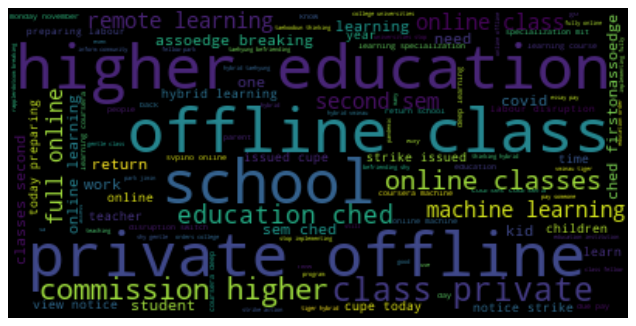

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import csv
from matplotlib import rcParams
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.util import ngrams
import re
import matplotlib.pyplot as plt

stop = stopwords.words('english')
text=list(df['tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

# join the list and lowercase all the words
text = ' '.join(clean).lower()
removal_list = ["hari","drawing","samsungid","win", "rt", "amp", "galaxy", "class prast", "prast along", "grand prize", "buds"]

for word in removal_list:
    text = text.replace(word, "")

#create the wordcloud object
wordcloud = WordCloud(
                      collocations=True).generate(text)

#plot the wordcloud object
plt.figure(figsize=(10, 6), dpi=80)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()


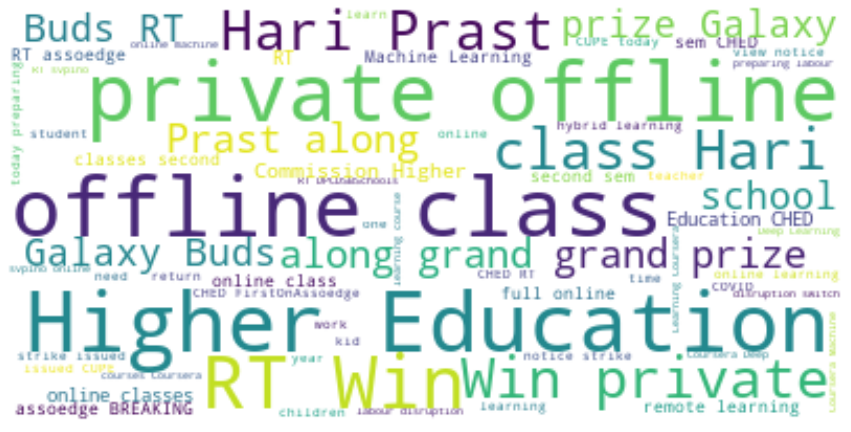

In [ ]:
from wordcloud import STOPWORDS

text = " ".join(i for i in df.tweet)
removal_list = ["hari","drawing","samsungID","win", "rt", "amp", "galaxy"]

for word in removal_list:
    text = text.replace(word, "")

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/drive')
df = pd.read_csv('/drive/Shared drives/Data Visualization -230/tweetdatasentiment.csv')

Mounted at /drive


In [ ]:
df["word_count"] = df.apply(lambda _: ' ', axis=1)

In [ ]:
for i in range(df.shape[0]):
  df.word_count[i] = len(df.tweet[i].strip().split(" "))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


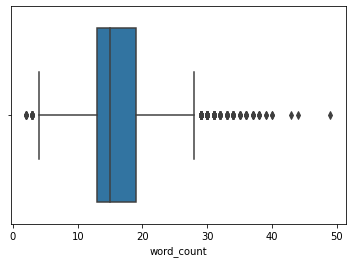

In [ ]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

# Box Plot
import seaborn as sns
sns.boxplot(df['word_count'])

In [ ]:
import numpy as np

# Position of the Outlier
print(np.where(df['word_count']<4))

(array([  10,   11,   25,   90,  107,  215,  235,  254,  559,  634,  653,
        673,  698,  742,  950, 1586, 1736, 2514, 2582, 2717]),)


In [ ]:
print("Old Shape: ", df.shape)

Old Shape:  (2893, 5)


In [ ]:
array = [10,   11,   25,   90,  107,  215,  235,  254,  559,  634,  653, 673,  698,  742,  950, 1586, 1736, 2514, 2582, 2717]
df.drop(array, inplace = True)

In [ ]:
print("New Shape: ", df.shape)

New Shape:  (2873, 5)
